In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [2]:
unlabelled_imgs = os.listdir("frames")
unlabelled_imgs = [i for i in unlabelled_imgs if i.split(".")[-1] == "jpg"]

In [3]:
len(unlabelled_imgs)

8488

In [4]:
categories = os.listdir("labelled")
categories

['bramka',
 'closeup2_group',
 'closeup2_single',
 'closeup_group',
 'closeup_single',
 'crowd',
 'faul',
 'playingfield']

In [5]:
X, X_names = [], []
y = []

for category in categories:
    imgs = os.listdir(f"labelled/{category}")
    for img in imgs:
        X_names.append(img)
        X.append(cv2.imread(f"labelled/{category}/{img}"))
        y.append(categories.index(category))    

In [6]:
len(X)

1729

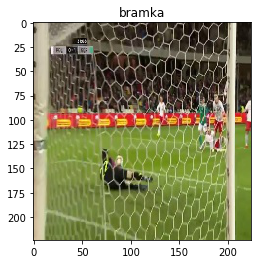

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

id_ = 72

img_path = f"{os.getcwd()}\\labelled\\{categories[y[id_]]}\\{X_names[id_]}"

plt.imshow(Image.open(img_path))
plt.title(categories[y[id_]])
plt.show()

In [8]:
from random import shuffle
import random

random.seed(22)
data = []

for i in range(len(X)):
    data.append([X[i], y[i]])
    
shuffle(data)

In [9]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(1729, 224, 224, 3)
(1729,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as ly

model = Sequential()
model.add(ly.Conv2D(96, (11, 11), strides=(4, 4), input_shape=(224, 224, 3), activation="relu"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))
          
model.add(ly.Conv2D(256, (5, 5), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(ly.Conv2D(384, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
          
model.add(ly.Conv2D(384, (1, 1), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
          
model.add(ly.Conv2D(256, (1, 1), strides=(1,1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(ly.Flatten())
          
model.add(ly.Dense(4096, activation="relu"))
model.add(ly.Dropout(0.5))

model.add(ly.Dense(4096, activation="relu"))
model.add(ly.Dropout(0.5))
          
model.add(ly.Dense(len(categories), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       8

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [13]:
history = model.fit(X, y, epochs=70)

Epoch 1/70
55/55 [==============================] - 4s 81ms/step - loss: 1.9186 - accuracy: 0.5882
Epoch 2/70
55/55 [==============================] - 4s 72ms/step - loss: 1.3174 - accuracy: 0.6703
Epoch 3/70
55/55 [==============================] - 4s 74ms/step - loss: 1.2506 - accuracy: 0.6692
Epoch 4/70
55/55 [==============================] - 4s 73ms/step - loss: 0.9898 - accuracy: 0.7091
Epoch 5/70
55/55 [==============================] - 4s 74ms/step - loss: 1.0620 - accuracy: 0.7016
Epoch 6/70
55/55 [==============================] - 4s 76ms/step - loss: 0.9118 - accuracy: 0.7270
Epoch 7/70
55/55 [==============================] - 4s 74ms/step - loss: 0.9151 - accuracy: 0.7259
Epoch 8/70
55/55 [==============================] - 4s 73ms/step - loss: 0.7760 - accuracy: 0.7519
Epoch 9/70
55/55 [==============================] - 4s 72ms/step - loss: 0.7294 - accuracy: 0.7623
Epoch 10/70
55/55 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.76 - 4s 73ms/step -

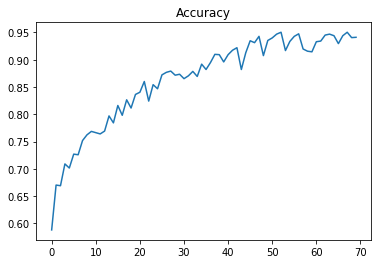

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.title("Accuracy")
plt.show()

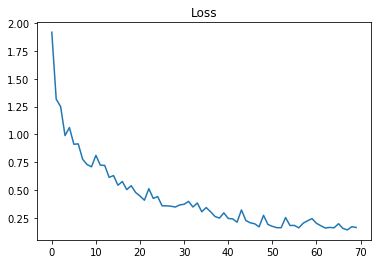

In [15]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [59]:
imgs = np.array([])
for i in os.listdir("frames"):
    img = cv2.imread(f"frames/{i}") 
    imgs = np.append(imgs, img)

KeyboardInterrupt: 

In [ ]:
imgs.shape

In [52]:
imgs = np.array(imgs).reshape(-1, 224, 224, 3)
imgs.shape

ValueError: cannot reshape array of size 8488 into shape (224,224,3)

In [23]:
predicted_labels = model.predict(imgs)

ValueError: cannot reshape array of size 8488 into shape (224,224,3)

In [ ]:
predicted_labels[0]